# Implementacion TreeMap (BETA)

- **Nicolas Pastor Bueno**. <npastorb@udd.cl>,
- **Maria Alejandra Hermosilla Urriola**. <@udd.cl>,
- **Cesar Patricio Diaz Ramos**. <@udd.cl>.

Creado: **16 de octubre de 2021**.

El objetivo de este notebook es poder demotrar implementaciones en TreeMap a traves de 'AVES' y con dependenia de SQUARIFY.PY

In [ ]:
!pip uninstall matplotlib -y
!pip install -q condacolab
import condacolab
condacolab.install_mambaforge()

!git clone https://github.com/napb/aves.git aves_git
!mamba env update --name base --file aves_git/environment-colab.yml

In [2]:
import sys
from pathlib import Path
from aves.data import eod

AVES_ROOT = Path("..") if not "google.colab" in sys.modules else Path("aves_git")

EOD_PATH = AVES_ROOT / "data" / "external" / "EOD_STGO"
EOD_PATH

viajes = eod.read_trips(EOD_PATH)
personas = eod.read_people(EOD_PATH)
viajes_persona = viajes.merge(personas)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import squarify

viajes_persona = viajes_persona[
    viajes_persona['IngresoFinal'] > 200000
]


res = viajes_persona.groupby(by='ComunaOrigen').agg(
    param=pd.NamedAgg(column='IngresoFinal', aggfunc='count')
).reset_index()

#res.sort_values(by=['param'])

In [10]:
import matplotlib.pyplot as plt
import matplotlib
import squarify
import pandas as pd

def drawTreeMapSumAggr( #
    df: pd.DataFrame,
    group_by_column: str,
    aggregated_column: str,
    axis: bool,
    pad: bool,
    legend_class: str,
    x_size: int,
    y_size: int,
    color_blues: bool,
    title: dict):
    drawTreemap(df, group_by_column, aggregated_column, "sum", axis, pad, legend_class, x_size, y_size, color_blues, title)

def drawTreeMapAvgAggr( #
    df: pd.DataFrame,
    group_by_column: str,
    aggregated_column: str,
    axis: bool,
    pad: bool,
    legend_class: str,
    x_size: int,
    y_size: int,
    color_blues: bool,
    title: dict):
    drawTreemap(df, group_by_column, aggregated_column, "mean", axis, pad, legend_class, x_size, y_size, color_blues, title)

def drawTreeMapMaxAggr( #
    df: pd.DataFrame,
    group_by_column: str,
    aggregated_column: str,
    axis: bool,
    pad: bool,
    legend_class: str,
    x_size: int,
    y_size: int,
    color_blues: bool,
    title: dict):
    drawTreemap(df, group_by_column, aggregated_column, "max", axis, pad, legend_class, x_size, y_size, color_blues, title)

def drawTreeMapMinAggr(
    df: pd.DataFrame,
    group_by_column: str,
    aggregated_column: str,
    axis: bool,
    pad: bool,
    legend_class: str,
    x_size: int,
    y_size: int,
    color_blues: bool,
    title: dict):
    drawTreemap(df, group_by_column, aggregated_column, "min", axis, pad, legend_class, x_size, y_size, color_blues, title)

def drawTreeSizeAggr(
    df: pd.DataFrame,
    group_by_column: str,
    aggregated_column: str,
    axis: bool,
    pad: bool,
    legend_class: str,
    x_size: int,
    y_size: int,
    color_blues: bool,
    title: dict):
    drawTreemap(df, group_by_column, aggregated_column, "size", axis, pad, legend_class, x_size, y_size, color_blues, title)

def drawTreemap(
    df: pd.DataFrame,
    group_by_column: str,
    aggregated_column: str,
    aggregated_function: str,
    axis: bool,
    pad: bool,
    legend_class: str,
    x_size: int,
    y_size: int,
    color_blues: bool,
    title: dict):

    fig = plt.gcf()
    fig.add_subplot()
    fig.set_size_inches(x_size, y_size)

    res = df.groupby(by=group_by_column).agg(
        param=pd.NamedAgg(column=aggregated_column, aggfunc=aggregated_function)
    ).reset_index().sort_values(by=['param'])

    plot_legend(res, group_by_column, legend_class)

    if bool(title):
        plt.title(title['title'], fontsize = title['fontsize'], fontweight = title['fontweight'])


    squarify.plot(
        sizes = res['param'],
        label=  res['label'],
        alpha = 0.6,
        pad = pad,
        color = normalize_colors(df, aggregated_column) if color_blues else None
    )

    if not axis:
        plt.axis('off')

    plt.show()
    return res

def plot_legend(df: pd.DataFrame, group_by_column: str, legend_class: str) :
    if legend_class == "legend_class_aggr":
        df['label'] = df[group_by_column].astype(str) + "\n(" + df['param'].round(2).astype(str) + ")"
    elif legend_class == "legend_class" :
        df['label'] = df[group_by_column].astype(str)
    else :
        df['label'] = ""

def normalize_colors(df: pd.DataFrame, column: str) :
    norm = matplotlib.colors.LogNorm(
        vmin=min(df[column]),
        vmax=max(df[column])
    )
    return [matplotlib.cm.Greens(norm(value)) for value in df[column]]


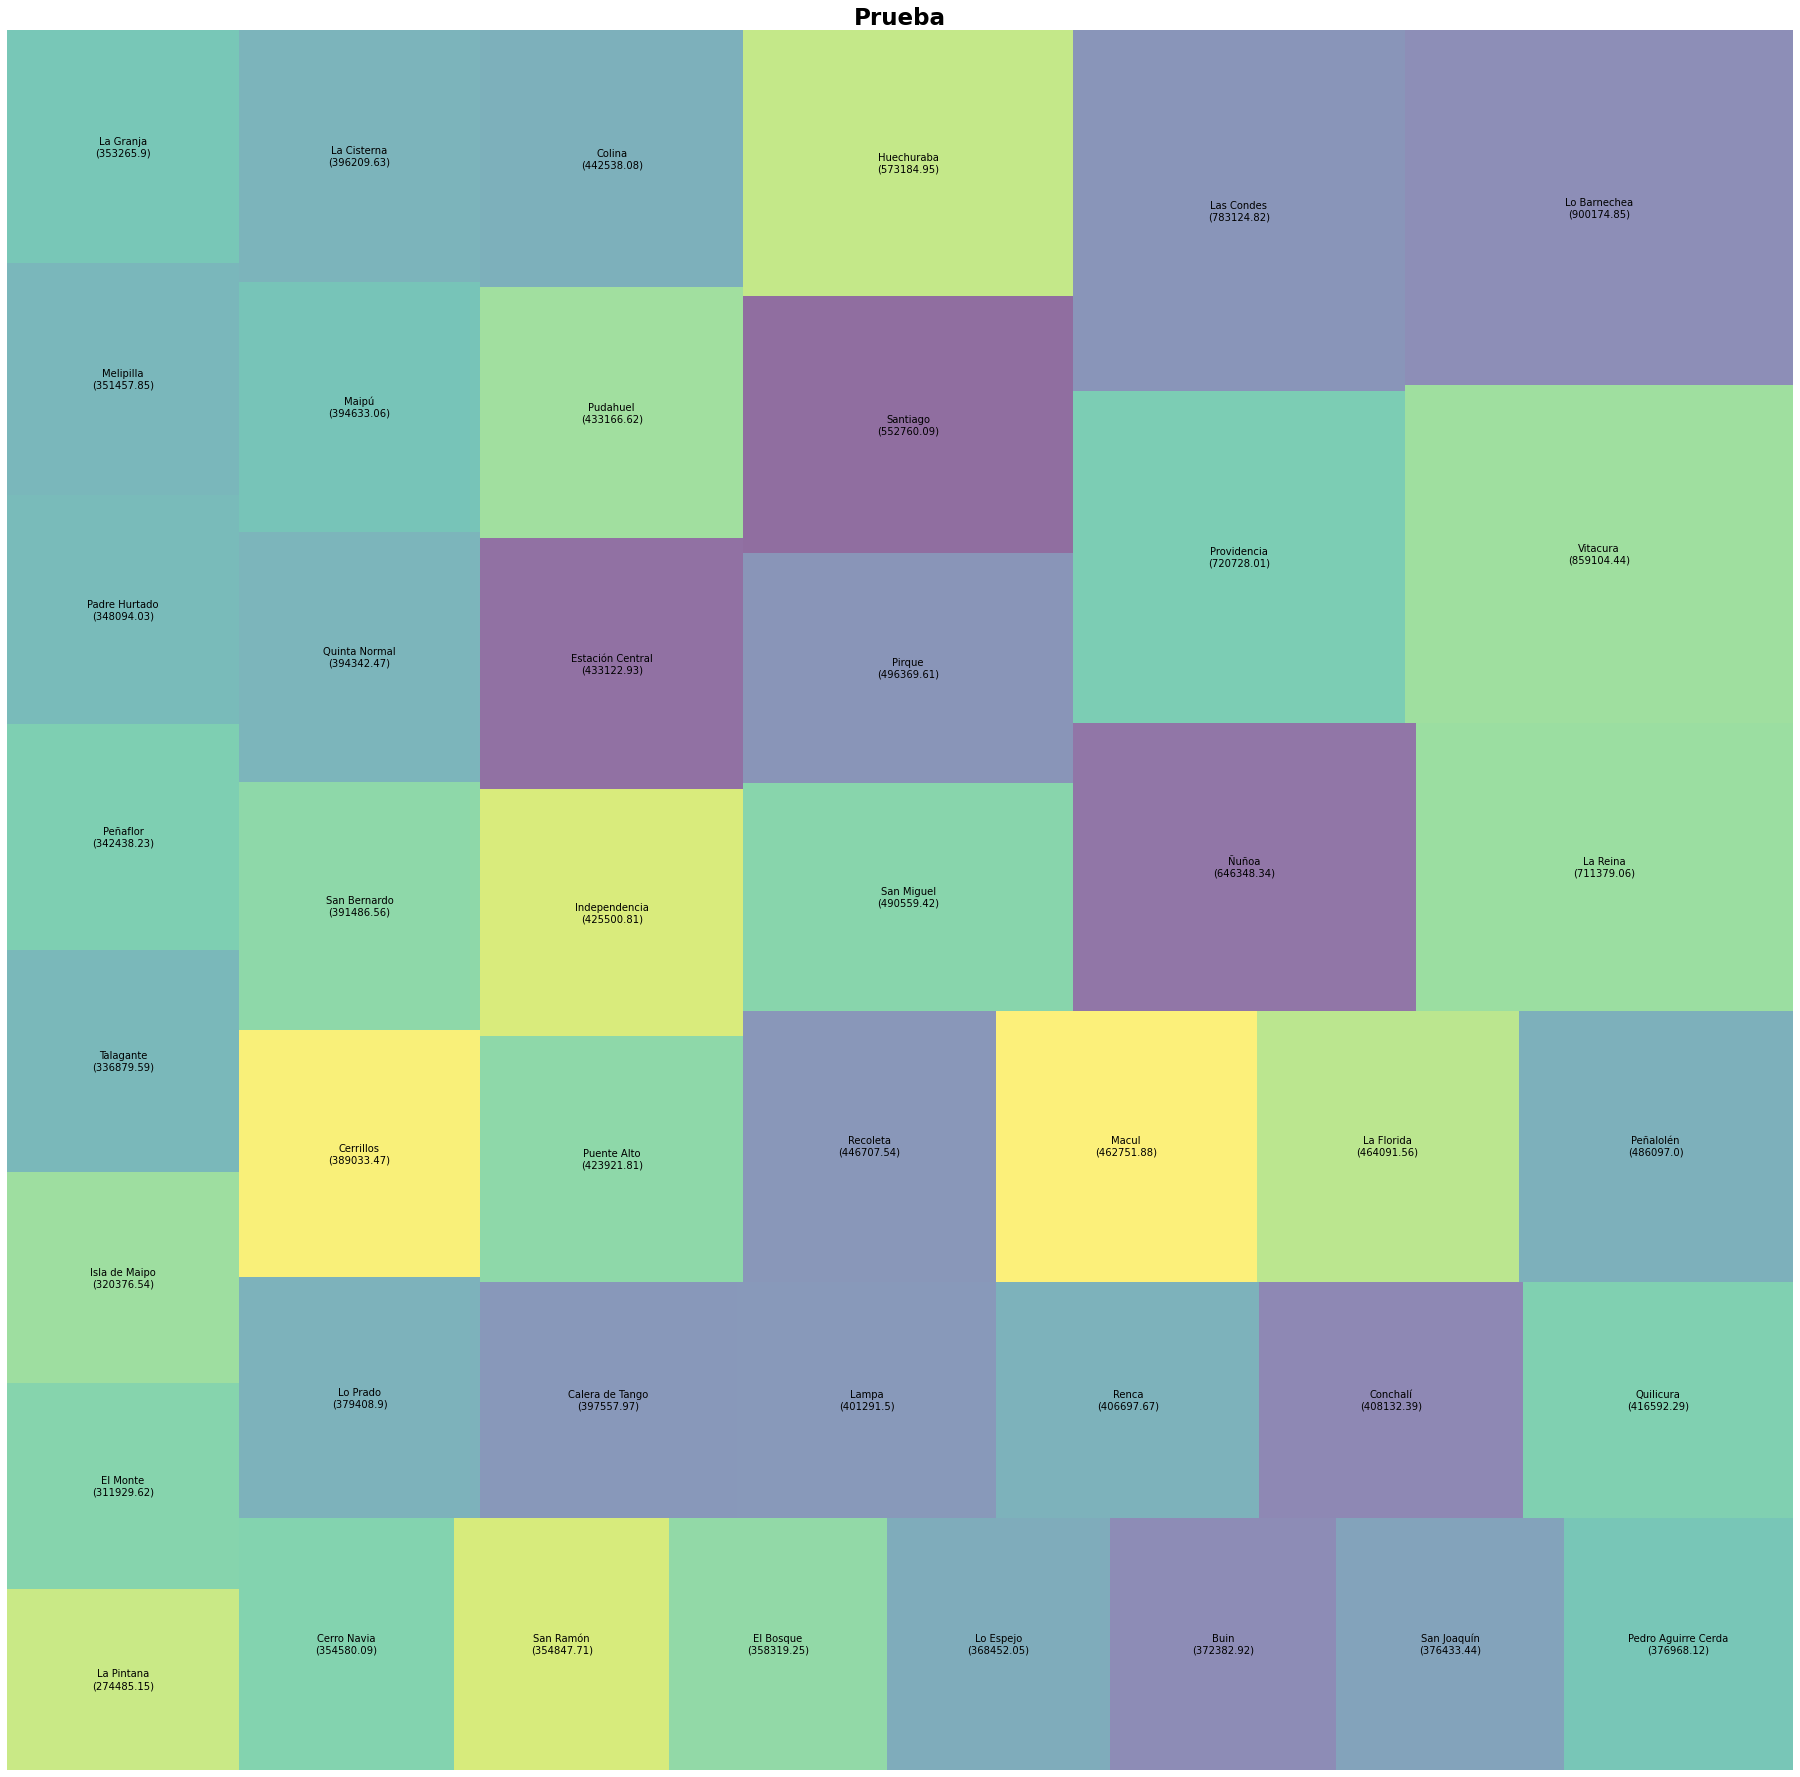

In [11]:
'''
Con la implementacion del metodo drawTreeMapSumAggr(dataFrame, columna_de_agrupacion, columna_de_agregacion, impresion_de_margenes, leyenda) dentro de
aves, podemos renderizar un treemap
'''
#from aves.visualization.treemap import drawTreeMapAvgAggr

drawTreeMapAvgAggr(
    viajes_persona,
    'ComunaOrigen',
    'IngresoFinal',
    False,
    False,
    "legend_class_aggr",
    32,
    32,
    False,
    {'title' : 'Prueba', 'fontsize' : 23, 'fontweight': 'bold'})


In [95]:
'''
Se define seaborn solo para cargar el dataset titanic, a modo de prueba para un treemap
'''

import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


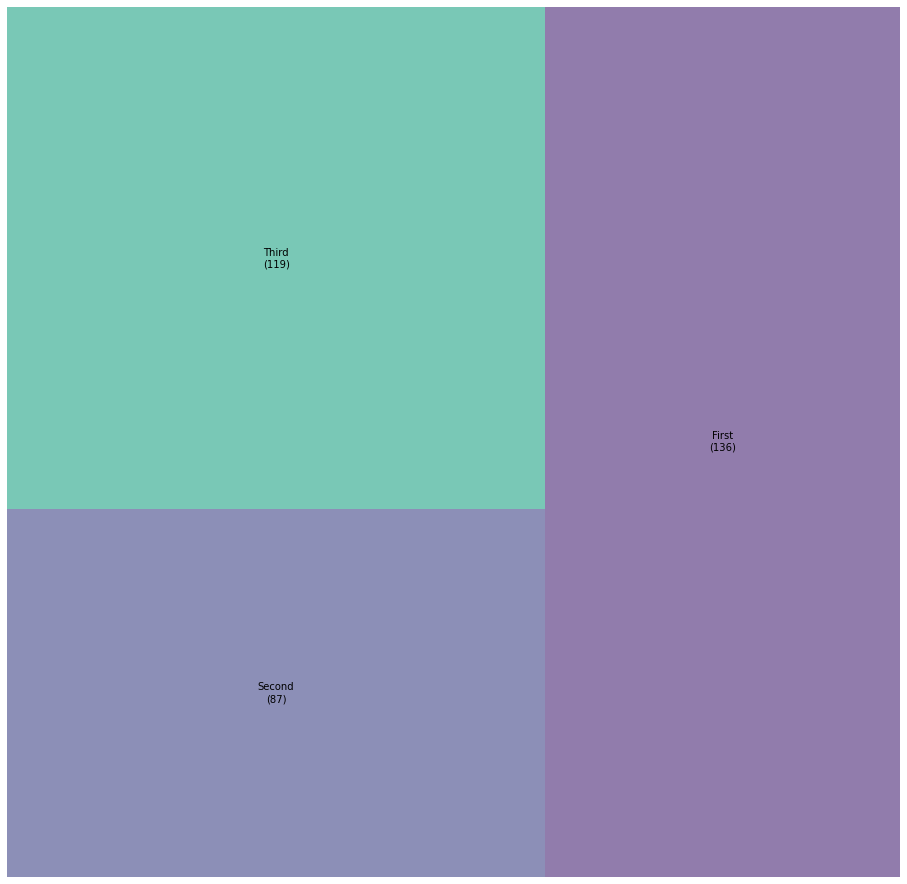

In [110]:
'''
Con la implementacion del metodo drawTreeMapSumAggr(dataFrame, columna_de_agrupacion, columna_de_agregacion, impresion_de_margenes, leyenda) dentro de
aves, podemos renderizar un treemap
'''

#drawTreeMapSumAggr(titanic, 'class', 'survived', False, "legend_class_aggr")

drawTreeMapSumAggr(
    titanic,
    'class',
    'survived',
    False,
    False,
    "legend_class_aggr",
    16,
    16,
    False)